In [3]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import torch

a = torch.empty((1, 1, 32, 32))
print(a.nbytes)
b = torch.nn.functional.unfold(a, 5)
print(b.nbytes)
print(b.nbytes / a.nbytes)

4096
78400
19.140625


(0.94, 0.97)

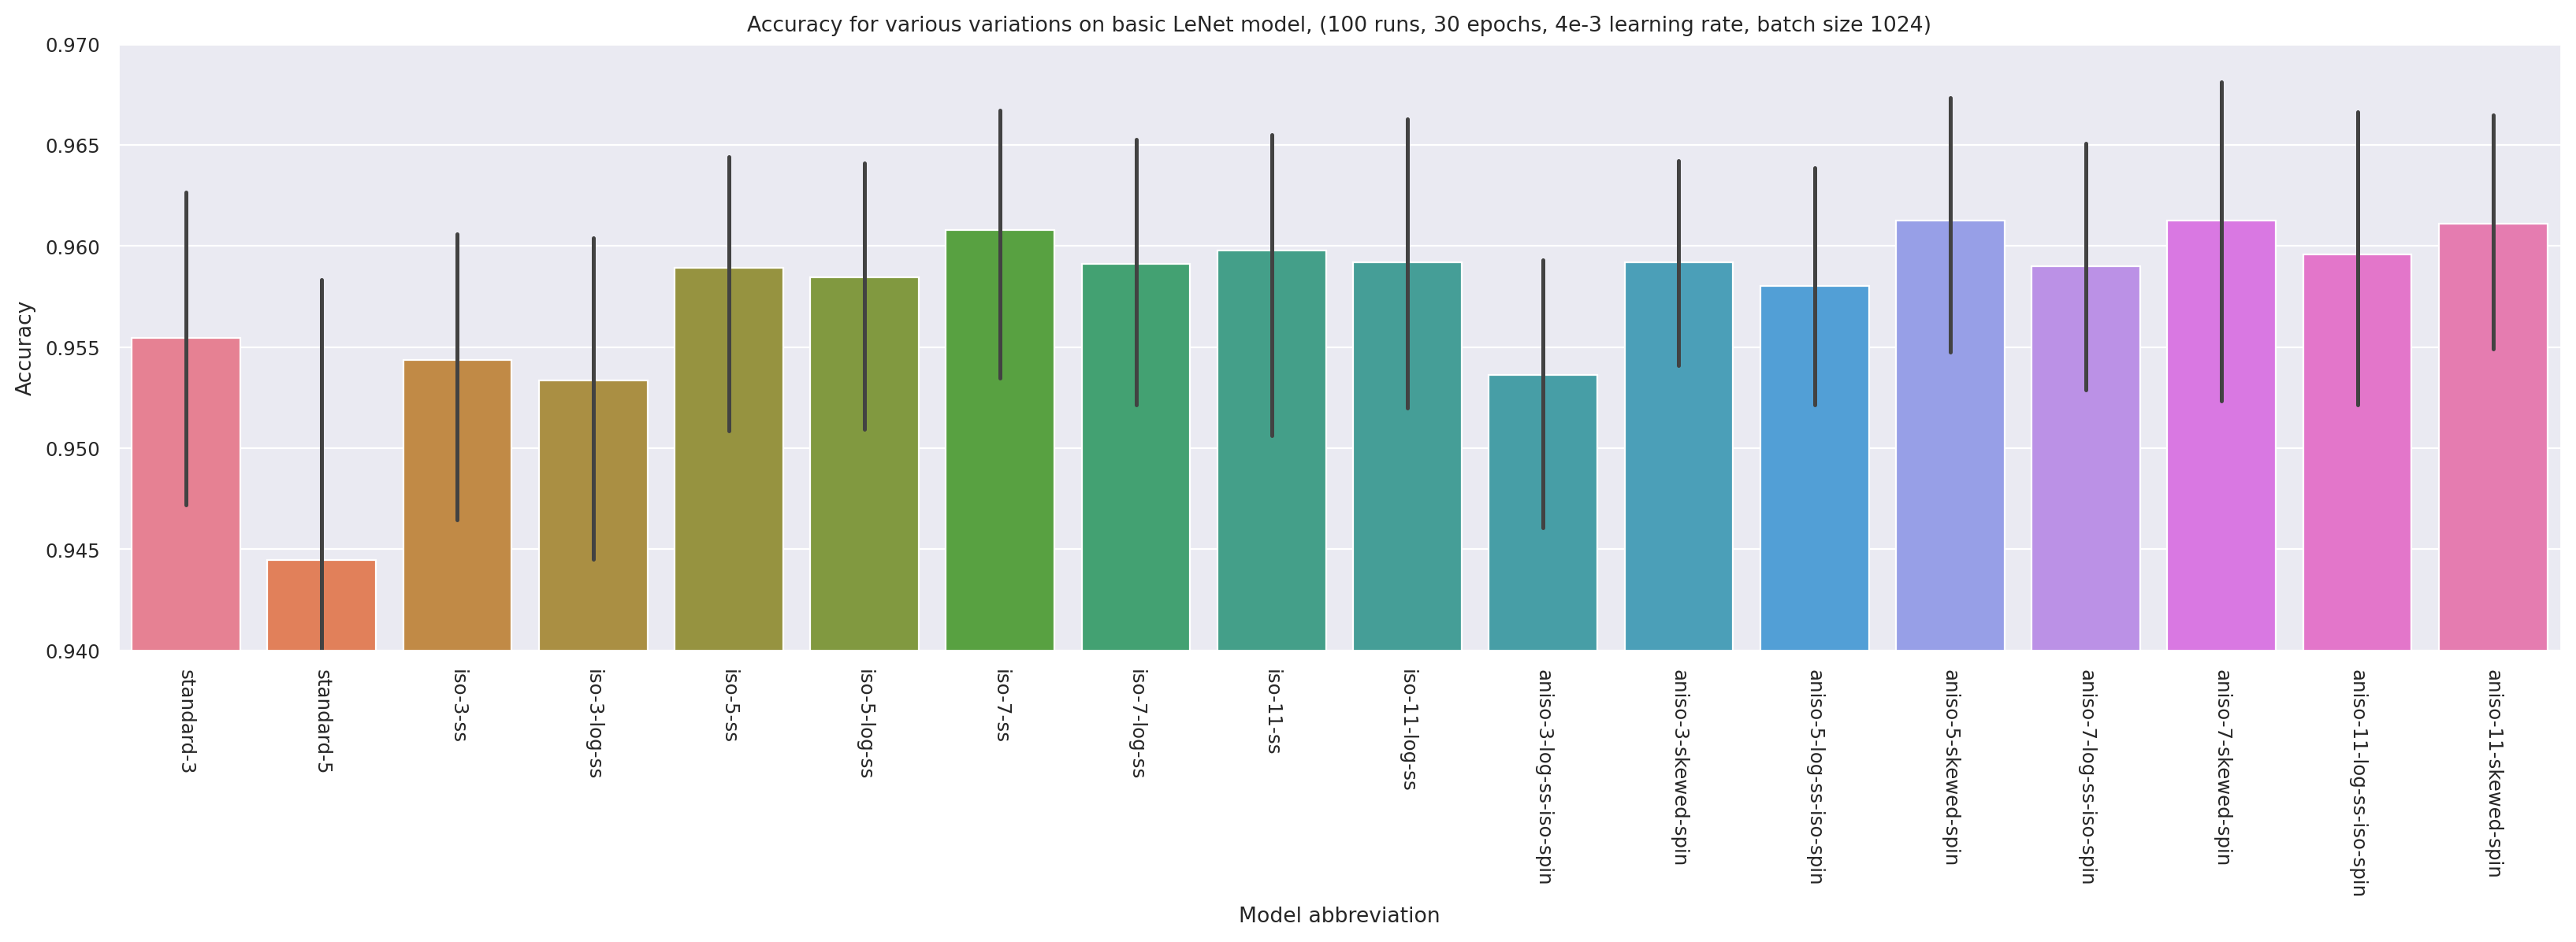

In [4]:
full_df = pl.scan_parquet("./.data/long_k_mnist.pq")
# full_df = pl.scan_parquet(f"./.data/long_{dataset}.pq")
cols = sorted(full_df.collect_schema().names(), key=lambda n: (n.split("-")[0], -int(n.split("-")[1])), reverse=True)
df = full_df.select(pl.col(cols).struct.field("acc").name.keep()).collect()
plt.figure(figsize=(20, 5), dpi=200)
sns.set_theme("paper", "darkgrid")
sns.barplot(df.to_pandas(), errorbar=("pi", 90)).set(
    ylabel="Accuracy",
    xlabel="Model abbreviation",
    # title="Replication of Blankenstein's LeNet results on K-MNIST (100 runs, 5 epochs, 1e-3 learning rate, batch size 32)"
    title="Accuracy for various variations on basic LeNet model, (100 runs, 30 epochs, 4e-3 learning rate, batch size 1024)",
)
plt.xticks(rotation=-90)
# plt.axhline(0.957, linestyle="dashed", color="gray")
plt.ylim(0.94, 0.97)  # K-MNIST
# plt.ylim(0.89, 0.92)  # Fashion
# plt.ylim(0.90, 0.97)  # Closing K-MNIST
# plt.ylim(0.85, 0.88)  # CIFAR10

In [ ]:
pl.scan_parquet("../.data/long_k_mnist.pq").select(
    pl.col(cols).struct.field("times").name.keep()
).unpivot().collect()

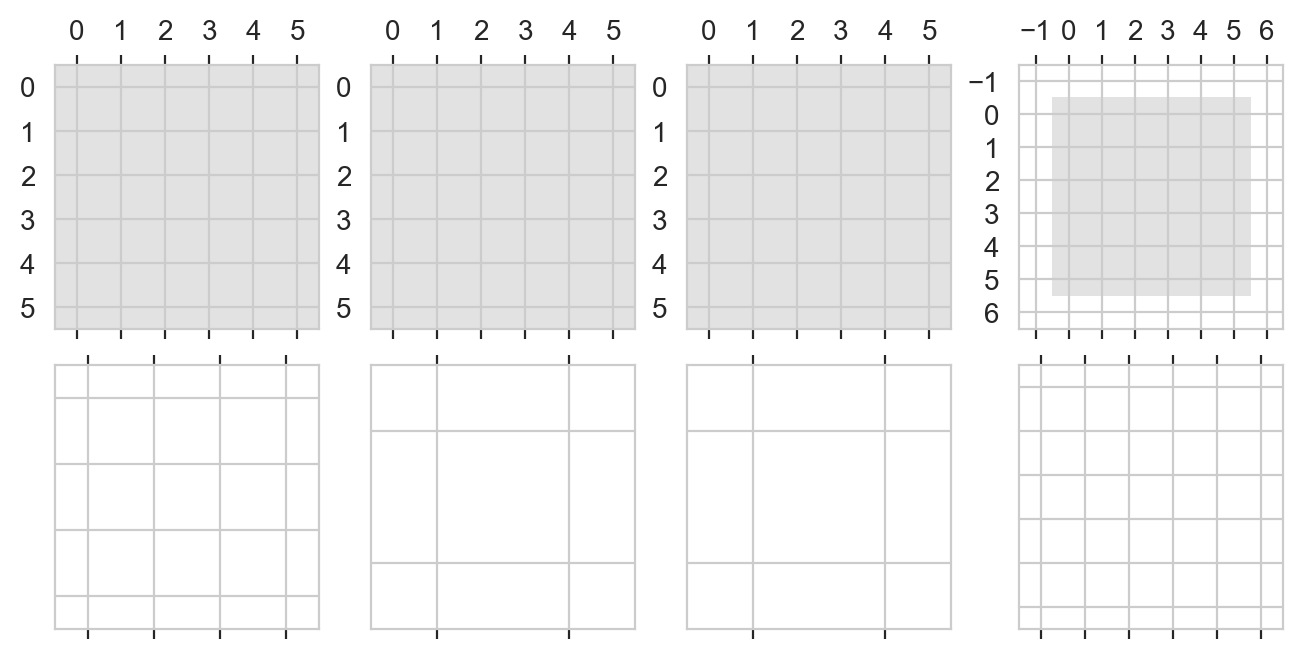

In [2]:
# plt.rc("font", family="Latin Modern Roman")

_, axss = plt.subplots(2, 4, layout="compressed", dpi=200)
for ax in axss[0]:
    ax.matshow(np.ones((6, 6)), cmap="Greys", vmin=0, vmax=5)
    # ax.set_title(title)

pad_outer = np.zeros((8, 8))
pad_outer[:6, :6] = 1
axss[0, 3].matshow(pad_outer, vmin=0, vmax=5, cmap="Greys")
axss[0, 3].set(ylim=(-1.5, 6.5), xlim=(-1.5, 6.5))
axss[0, 3].invert_yaxis()

for ax, outsize in zip(axss[1], ((4, 4), (2, 2), (2, 2), (6, 6))):
    ax.matshow(np.zeros(outsize), cmap="Greys")
    ax: plt.Axes
    ticks_x = ax.get_xticks()
    ticks_y = ax.get_yticks()
    ax.set_xticks(ticks_x, labels=[""] * len(ticks_x))
    ax.set_yticks(ticks_x, labels=[""] * len(ticks_y))
    ax.set(
        xlim=(ticks_x[0] + 0.5, ticks_x[-1] - 0.5),
        ylim=(ticks_y[0] + 0.5, ticks_y[-1] - 0.5),
    )

plt.savefig("grid.svg")

In [6]:
import torch

a = torch.arange(9).reshape(3, 3)
print(a.stride())
a

(3, 1)


tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [7]:
a.as_strided((2, 2, 2, 2), (3, 1, 3, 1))

tensor([[[[0, 1],
          [3, 4]],

         [[1, 2],
          [4, 5]]],


        [[[3, 4],
          [6, 7]],

         [[4, 5],
          [7, 8]]]])

In [ ]:
torch.as_strided()

In [8]:
torch.arange(3).as_strided((3,), (-1,), 4 * 3)

RuntimeError: as_strided: Negative strides are not supported at the moment, got strides: [-1]

In [11]:
import numpy as np

b = np.arange(9).reshape(3, 3)
print(b.strides)
b

(24, 8)


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [12]:
np.lib.stride_tricks.as_strided(b, (2, 2, 2, 2), (24, 8, 24, 8))

array([[[[0, 1],
         [3, 4]],

        [[1, 2],
         [4, 5]]],


       [[[3, 4],
         [6, 7]],

        [[4, 5],
         [7, 8]]]])

In [31]:
bs = np.arange(3)
print(bs.data)
np.lib.stride_tricks.as_strided(bs[2:], (3,), (-8,))

array([2, 1, 0])

In [34]:
np.lib.stride_tricks.as_strided(b[1:, 1:], (2, 2, 2, 2), (24, 8, -24, -8))

array([[[[4, 3],
         [1, 0]],

        [[5, 4],
         [2, 1]]],


       [[[7, 6],
         [4, 3]],

        [[8, 7],
         [5, 4]]]])